## Making figure A5

Start by importing modules, data and priors.

In [8]:
import arviz as az
import matplotlib.pylab as plt
import numpyro.distributions as dist
import h5py

from makeCorner import *

In [9]:
data_mass_variation = h5py.File("../data/mass_variation_analysis.hdf", "r")

In [10]:
new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "mu_m1":dist.Uniform(15,60),
    "mMin":dist.Uniform(5,15),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "high_alpha_z": dist.Normal(0,4),
    "log_width_alpha_z": dist.Uniform(-1,3),
    "middle_m_alpha_z": dist.Uniform(20,75),
    "beta_z":dist.Uniform(0,10),
    "high_beta_z": dist.Uniform(0,10),
    "log_width_beta_z": dist.Uniform(-1,3),
    "middle_m_beta_z": dist.Uniform(20,75),
    "low_zp": dist.Uniform(0.2,4),
    "high_zp": dist.Uniform(0.2,4),
    "log_width_zp": dist.Uniform(-1,3),
    "middle_m_zp": dist.Uniform(20,75),
    "sig_m1": dist.Uniform(1.5, 15),
    "delta_alpha_z":dist.Normal(0, np.sqrt(3^2 + 4^2))
}

### Making the figure

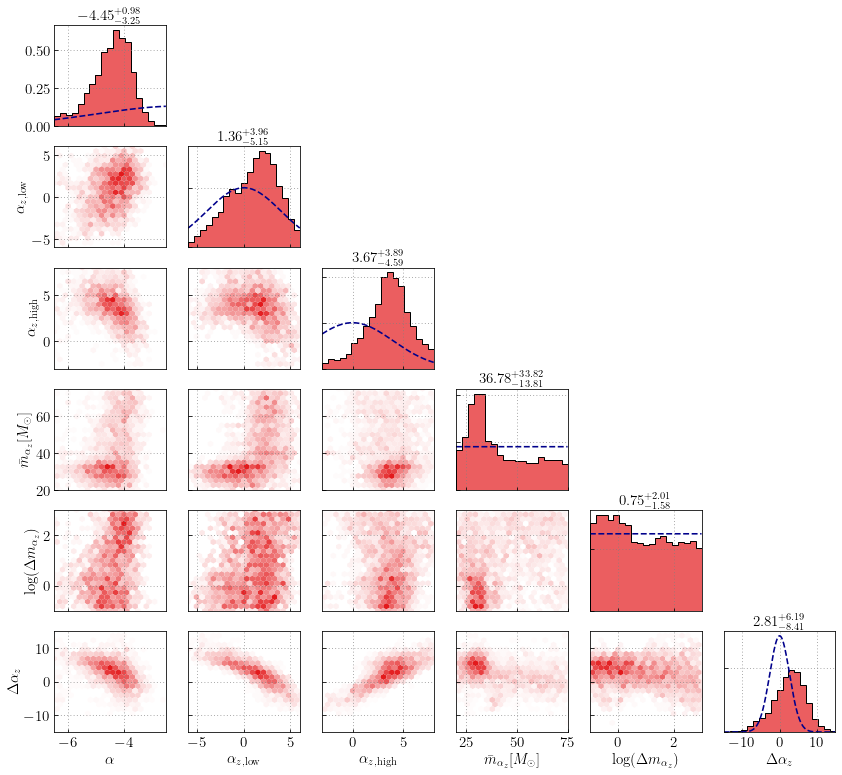

In [11]:
fig = plt.figure(figsize=(14,13))
delta_alpha_z = data_mass_variation['posterior/high_alpha_z'][:] - data_mass_variation['posterior/alpha_z'][:]

toPlot_no_GWB = {
    "alpha_ref":{"data":data_mass_variation['posterior/alpha_ref'],"plot_bounds":(-6.5,-2.5),"label":r"$\alpha$"},
    "alpha_z":{"data":data_mass_variation['posterior/alpha_z'],"plot_bounds":(-6,6),"label":r"$\alpha_{z, \rm low}$"},
    "high_alpha_z":{"data":data_mass_variation['posterior/high_alpha_z'],"plot_bounds":(-3,8),"label":r"$\alpha_{z, \rm high}$"},
    "middle_m_alpha_z":{"data":data_mass_variation['posterior/middle_m_alpha_z'],"plot_bounds":(20,75),"label":r"$\bar m_{\alpha_z} [M_\odot]$"},
    "log_width_alpha_z":{"data":np.log10(data_mass_variation['posterior/width_alpha_z']),"plot_bounds":(-1,3),"label":r"log($\Delta m_{\alpha_z}$)"},
    "delta_alpha_z":{"data":delta_alpha_z, "plot_bounds":(-15,15),"label":r"$\Delta \alpha_z$"}
}

plot_corner(fig,toPlot_no_GWB,'#e31a1c',labelsize=15, priors = new_priors)
plt.savefig("figure_A5.pdf", dpi=500, bbox_inches='tight')
plt.show()